###  Practice - Python for data scientists III - eda viz

Answer all **Questions**

References:  
https://matplotlib.org/users/index.html   
https://github.com/cs109  
Python Data Science Handbook, Jake VanderPlas, 2017.    
The Visual Display of Quantitative Information, 2001.  
Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython, 2017.
Applied Multivariate Statistical Analysis, 2015.  

In [2]:
# The %... is an iPython magic command, and is not part of the Python language.
# In this case we're telling the plotting library to draw things in
# the notebook instead of in a separate window.
%matplotlib inline 

import numpy as np # imports a fast numerical programming library
import scipy as sp # imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm # allows us easy access to colormaps
import matplotlib.pyplot as plt # sets up plotting under plt
import pandas as pd # lets us handle data as dataframes

#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

### Getting the mtcars dataset into shape

 

The documentation for this data is [here](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html) but I have extracted some relevant parts below:

```
Description

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

Usage

mtcars
Format

A data frame with 32 observations on 11 variables.

[, 1]	mpg	Miles/(US) gallon
[, 2]	cyl	Number of cylinders
[, 3]	disp	Displacement (cu.in.)
[, 4]	hp	Gross horsepower
[, 5]	drat	Rear axle ratio
[, 6]	wt	Weight (1000 lbs)
[, 7]	qsec	1/4 mile time
[, 8]	vs	V/S
[, 9]	am	Transmission (0 = automatic, 1 = manual)
[,10]	gear	Number of forward gears
[,11]	carb	Number of carburetors
Source

Henderson and Velleman (1981), Building multiple regression models interactively. Biometrics, 37, 391–411.
```

In [18]:
dfcars=pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/mtcars.csv")
dfcars.head(15)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


#### Question 1

There is an poorly named column here. Change the "Unnamed: 0" column to "name".

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html


In [26]:
# your work here

dfcars = dfcars.rename(columns={'Unnamed: 0': 'name'})
dfcars

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [27]:
dfcars.shape

(32, 12)

#### Question 2

Parse out the car `maker` from column $0$, i.e., the column you just renamed, and create a new `maker` column with this information. Display the first 10 lines of this new column.


In [36]:
# your work here

def get_maker(model):
    for i in model:
        if i == ' ':
            return model[0:model.index(i)]
    
dfcars = dfcars.assign(maker = [get_maker(model) for model in dfcars['name']])

This is what the dataframe looks like now:

In [37]:
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,maker
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet


#### Question 3

Construct and display the `avg_mpg` series by using the "split-apply-combine" paradigm and summarizing within group data by a mean.

https://pandas.pydata.org/pandas-docs/version/0.23.4/groupby.html   

Your results should look similar to the following:

```
maker
AMC         15.200000
Cadillac    10.400000
Camaro      13.300000
Chrysler    14.700000
...
```

In [52]:
# Your work here
avg_mpg = dfcars.groupby('maker')['mpg'].mean()
avg_mpg.head()

maker
AMC         15.2
Cadillac    10.4
Camaro      13.3
Chrysler    14.7
Datsun      22.8
Name: mpg, dtype: float64

In [53]:
dfcars.hp.mean()

146.6875

In [54]:
dfcars['hp'].mean()

146.6875

In [55]:
dfcars.groupby('maker').hp.mean()

maker
AMC         150.000000
Cadillac    205.000000
Camaro      245.000000
Chrysler    230.000000
Datsun       93.000000
Dodge       150.000000
Duster      245.000000
Ferrari     175.000000
Fiat         66.000000
Ford        264.000000
Honda        52.000000
Hornet      142.500000
Lincoln     215.000000
Lotus       113.000000
Maserati    335.000000
Mazda       110.000000
Merc        134.714286
Pontiac     175.000000
Porsche      91.000000
Toyota       81.000000
Volvo       109.000000
Name: hp, dtype: float64

In [56]:
dfcars.groupby('maker')['hp'].mean()

maker
AMC         150.000000
Cadillac    205.000000
Camaro      245.000000
Chrysler    230.000000
Datsun       93.000000
Dodge       150.000000
Duster      245.000000
Ferrari     175.000000
Fiat         66.000000
Ford        264.000000
Honda        52.000000
Hornet      142.500000
Lincoln     215.000000
Lotus       113.000000
Maserati    335.000000
Mazda       110.000000
Merc        134.714286
Pontiac     175.000000
Porsche      91.000000
Toyota       81.000000
Volvo       109.000000
Name: hp, dtype: float64

In [57]:
g = dfcars.groupby('maker')
g['hp'].mean()

maker
AMC         150.000000
Cadillac    205.000000
Camaro      245.000000
Chrysler    230.000000
Datsun       93.000000
Dodge       150.000000
Duster      245.000000
Ferrari     175.000000
Fiat         66.000000
Ford        264.000000
Honda        52.000000
Hornet      142.500000
Lincoln     215.000000
Lotus       113.000000
Maserati    335.000000
Mazda       110.000000
Merc        134.714286
Pontiac     175.000000
Porsche      91.000000
Toyota       81.000000
Volvo       109.000000
Name: hp, dtype: float64

### Basic  Exploratory Data Analysis (EDA)  

Basic objectives for EDA:  

1. **Build** a DataFrame from the data (ideally, put all data into this object)
2. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed  
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

So far we have **built** the dataframe, and carried out very minimal cleaning (renaming) in this dataframe. 

### Exploring global properties

We are going to focus on visualizing global properties of the data set below. For now, we'll focus on `mpg` to illustrate the concepts, but you should be doing this for all the columns. It may identify interesting properties and even errors in the data.

While we do this, we will see several examples of the  `matplotlib` plotting experience.

Below, we are setting our matplotlib style to `ggplot`, which is modeled after an R library. The default is 'classic.' Feel free to experiment with other styles:   

https://matplotlib.org/users/style_sheets.html


In [58]:
plt.style.use('ggplot')

#### Bar Charts

Matplotlib is accessible via Pandas series. We can use the plot function with $kind="barh"$ to generate very nice horizontal bar charts.

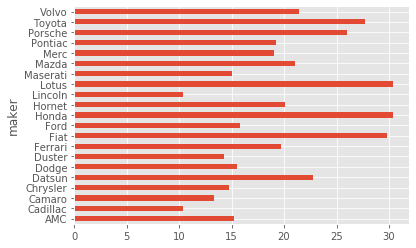

In [59]:
avg_mpg.plot(kind="barh")

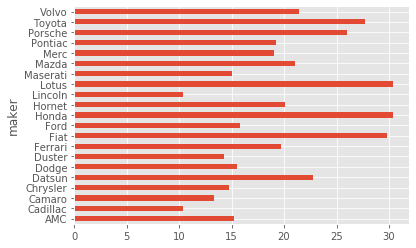

In [60]:
avg_mpg.plot(kind="barh")
plt.show() # we can remove the '<matplotlib.axes...' by adding a function that does not return anything.


#### Histograms

Numerical data leads to distributions, and distributions to histograms. Here is the Pandas default histogram:

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.hist.html   

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html  

Text(0.5, 0, 'mpg')

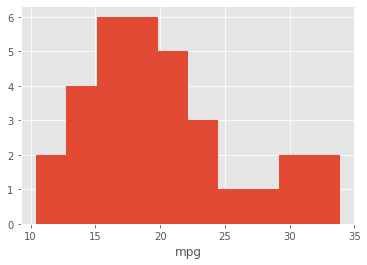

In [62]:
#Using pandas interface:
dfcars.mpg.hist()
plt.xlabel("mpg")

And matplotlib interface:

(array([2., 4., 6., 6., 5., 3., 1., 1., 2., 2.]),
 array([10.4 , 12.75, 15.1 , 17.45, 19.8 , 22.15, 24.5 , 26.85, 29.2 ,
        31.55, 33.9 ]),
 <a list of 10 Patch objects>)

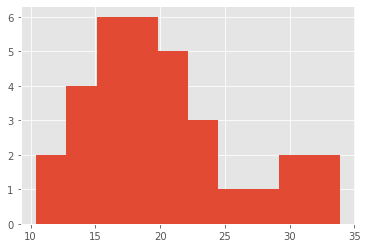

In [64]:
plt.hist(dfcars.mpg.values)

#### Question 4

Generate a histogram of mpg with 50 bins. Add a vertical line in blue, 75% of the plot height to show the mean mpg.

Your plot should look something like the following:  
    
<img src='hist_with_mean.png' width='500px'>    

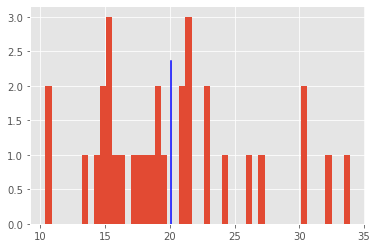

In [83]:
# Your work here

plt.hist(dfcars.mpg, bins=50)
plt.axvline(x = dfcars.mpg.mean(), color = 'b', ymax = .75)


We can add a kernel density estimate (KDE) to our histogram as follows:
    
https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.kde.html

Text(0.5, 0, 'mpg')

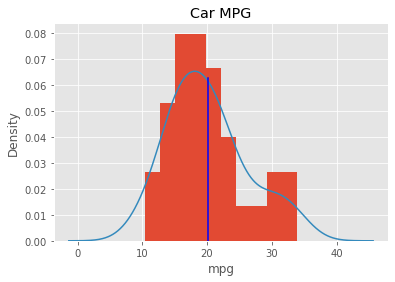

In [96]:
fig, ax = plt.subplots()
dfcars.mpg.hist(bins=10, density=True, ax=ax)
dfcars.mpg.plot.kde(ax=ax, legend=False, title='Car MPG')
plt.axvline(dfcars.mpg.mean(), 0, 0.75, color='b', label='Mean')
plt.xlabel("mpg")



### Plotting features against other features

Sometimes we want to see co-variation amongst our columns. A scatter-plot does this for us.

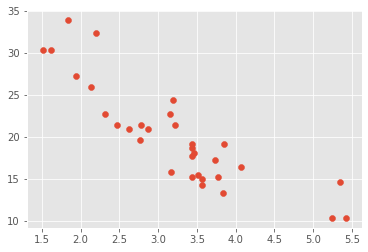

In [97]:
plt.scatter(dfcars.wt, dfcars.mpg);

Usually we use `plt.show()` at the end of every plot to show the plot. The magic function `%matplotlib inline` takes care of this for us, and we dont have to doit in the jupyter notebook. But if you run your puthon program from a file, you will need to explicitly have a call to show. Does not hurt us to include it and it eliminates the object reference.

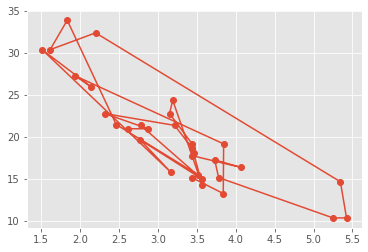

In [103]:
plt.plot(dfcars.wt, dfcars.mpg, marker='o')
plt.show()

If we want to save our figure into a file, the `savefig` needs to be in the same cell as the plotting commands. Go look at the files..

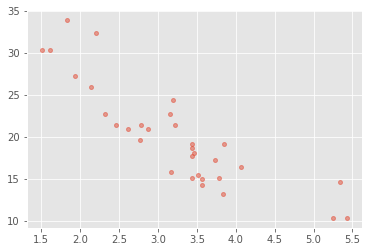

In [104]:
plt.plot(dfcars.wt, dfcars.mpg, 'o', markersize=4, alpha=0.5)
plt.savefig('scatter1.png')
plt.savefig('scatter2.png', bbox_inches='tight') #less whitespace around image

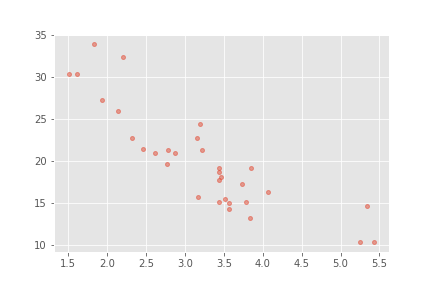

In [108]:
from IPython.display import Image
Image('scatter1.png')

#### Trend

The correlation that we saw might suggest a trend. We can capture it with a "regression". We'll learn more about regressions soon, but we show a quadratic fit here with a 1 standard deviation bar to show the graphics aspect of this. Also see the Seaborn `sns.regplot`.

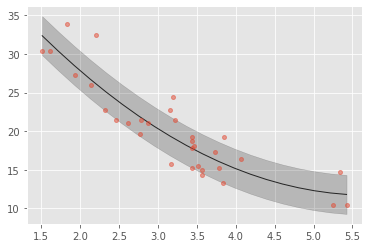

In [118]:
x = dfcars.wt
y = dfcars.mpg
params = np.polyfit(x, y, 2)
xp = np.linspace(x.min(), x.max(), 20)
yp = np.polyval(params, xp)
plt.plot(xp, yp, 'k', alpha=0.8, linewidth=1)
plt.plot(dfcars.wt, dfcars.mpg, 'o', markersize=4, alpha=0.5)
sig = np.std(y - np.polyval(params, x))
plt.fill_between(xp, yp - sig, yp + sig, 
                 color='k', alpha=0.2)

#### Question 5

Generate a scatter plot with a regression like the plot above for hp vs. mpg. Use 2 standard deviations. Please feel free to experiment.

Note the use of numpy polyfit above to fit a second-order polynomial to the data.

https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html

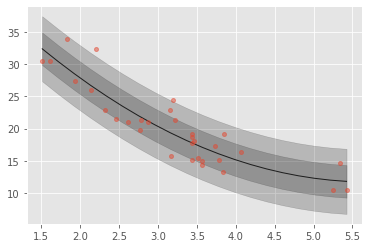

In [119]:
# your work here

x = dfcars.wt
y = dfcars.mpg
params = np.polyfit(x, y, 2)
xp = np.linspace(x.min(), x.max(), 20)
yp = np.polyval(params, xp)
plt.plot(xp, yp, 'k', alpha=0.8, linewidth=1)
plt.plot(dfcars.wt, dfcars.mpg, 'o', markersize=4, alpha=0.5)
sig = np.std(y - np.polyval(params, x))
plt.fill_between(xp, yp - sig, yp + sig, 
                 color='k', alpha=0.2)
plt.fill_between(xp, yp - 2*sig, yp + 2*sig, 
                 color='k', alpha=0.2)

### Group Properties

"Co-variational" plots, and single-variable plots, can be more interesting when we look at them *conditioned* upon the value of a categorical variable.

Such conditionality is behind the notion of grouping, where we group our data by various values of categorical variables, for example, whether our cars have an automatic transmission or not.

### Grouping of one outcome variable

The notion of grouping based on combinations of factors is used to make various easy-to-see exploratory visualizations for us. 

First, we make a boxplot of  `mpg`, grouped by transmission style.

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html

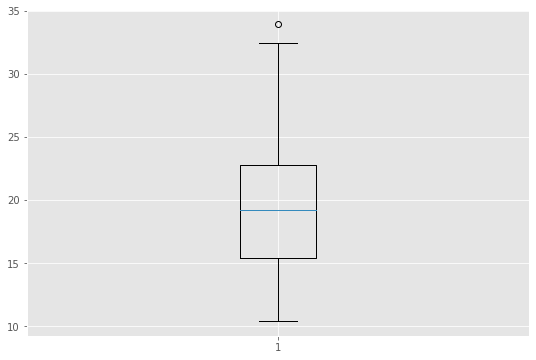

In [133]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(dfcars.mpg)


#### Question 6

Create boxplots for all mpg, hp, and disp on a single plot.

mpg   hp   disp
0  21.0  110  160.0
1  21.0  110  160.0
2  22.8   93  108.0
3  21.4  110  258.0
4  18.7  175  360.0
C:\Python37\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


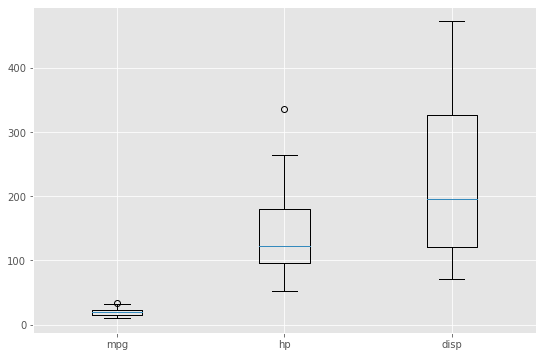

In [213]:
# Your work here

# figs = []

bps_index = ['mpg', 'hp', 'disp']
# for ind in bps_index:
#     fig2 = plt.figure(2)
#     ax = fig2.add_subplot()
#     bp = ax.boxplot(dfcars[ind])
#     fig2.show()

fig2 = plt.figure(1, figsize=(9, 6))

wanted_cars = dfcars[bps_index]
print(wanted_cars.head())
fig2 = plt.figure(1, figsize=(9,6))
ax = fig2.add_subplot()
bp = ax.boxplot(wanted_cars.T, labels=wanted_cars.columns)
fig2.show()

One can see that the difference in mpg is more significant between 6 and 8 cylinder cars, for manual transmissions. And that the large-range effect in automatics is coming almost entirely through 4-cylinder cars.  

What about the better mpg for automatics? We can see how representative these are in our sample. We'll show this using a cross-tabulation. Note: We can comine the cross-tab with a graph.


In [214]:
pd.crosstab(dfcars.am, dfcars.cyl)

cyl,4,6,8
am,,,
0,3,4,12
1,8,3,2


#### Problem 7

Examine the dtcar sets. Create a cross tab of two parameters of your choosing.

In [217]:
# Your work here

pd.crosstab(dfcars.gear, dfcars.carb)

carb,1,2,3,4,6,8
gear,,,,,,
3,3,4,3,5,0,0
4,4,4,0,4,0,0
5,0,2,0,1,1,1


### Faceting for general grouping

Seaborn package which is built on matplotlib provides a nice construct: the `FacetGrid`. You decide what variables to facet over, and then decide the kind of plot you want. Here we want hue to be `am`, and  different columns in the  plot grid to be cylinders. We then ask for a facet plot  of `mpg` against `wt` scatter.

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

Such plots are often called small multiple plots. They repeat the same plot based on categories, making sure that all plotting parameters are the same so that we have direct comparability.

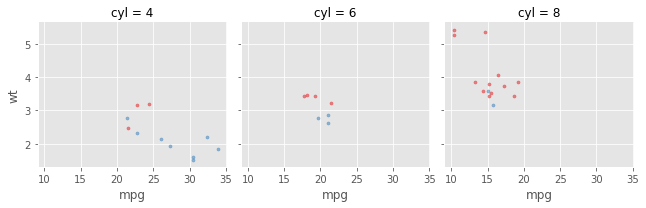

In [222]:
import seaborn as sns

g = sns.FacetGrid(dfcars, col="cyl", hue="am", palette="Set1")
g.map(plt.scatter, "mpg", "wt", alpha=0.5, s=10)

We can see that the "regression-like" effect is "cleanest" for automatic transmissions in 4 cylinder cars.

#### SPLOM, or Scatter Plot Matrix

Creating 2-by-2 basis for every pair of continuously co-varying features can get tedious.  The `PairGrid`, colorable by transmission type, allows us to do this comparison for 5 continuous features here, with the diagonal being a kernel density estimate.

https://seaborn.pydata.org/generated/seaborn.PairGrid.html


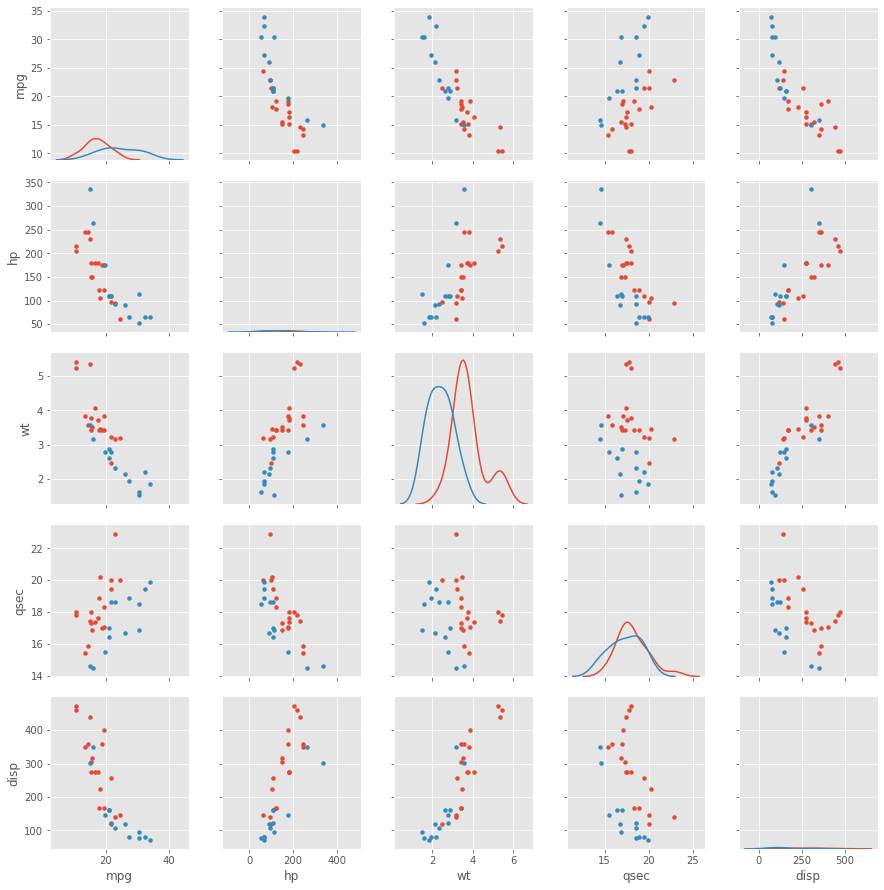

In [223]:
g = sns.PairGrid(dfcars, vars=['mpg', 'hp', 'wt', 'qsec', 'disp'], hue="am")
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter, s=15)

In many places, for example `mpg` vs `disp`, you will see two separate trends for the different transmissions. This suggests the addition of a transmission term as a **indicator** variable in regressions for `mpg` against various features. This changes the intercept of the regression. But the trends have different slopes as well, which suggests that `disp` may interact with `am`, the transmission indicator to create a varying slope as well.

#### Question 8

Experiment with sns.PairGrid using coloring for categorical variables other than `am` and see if you can identify any changes in scatter plot pairs.

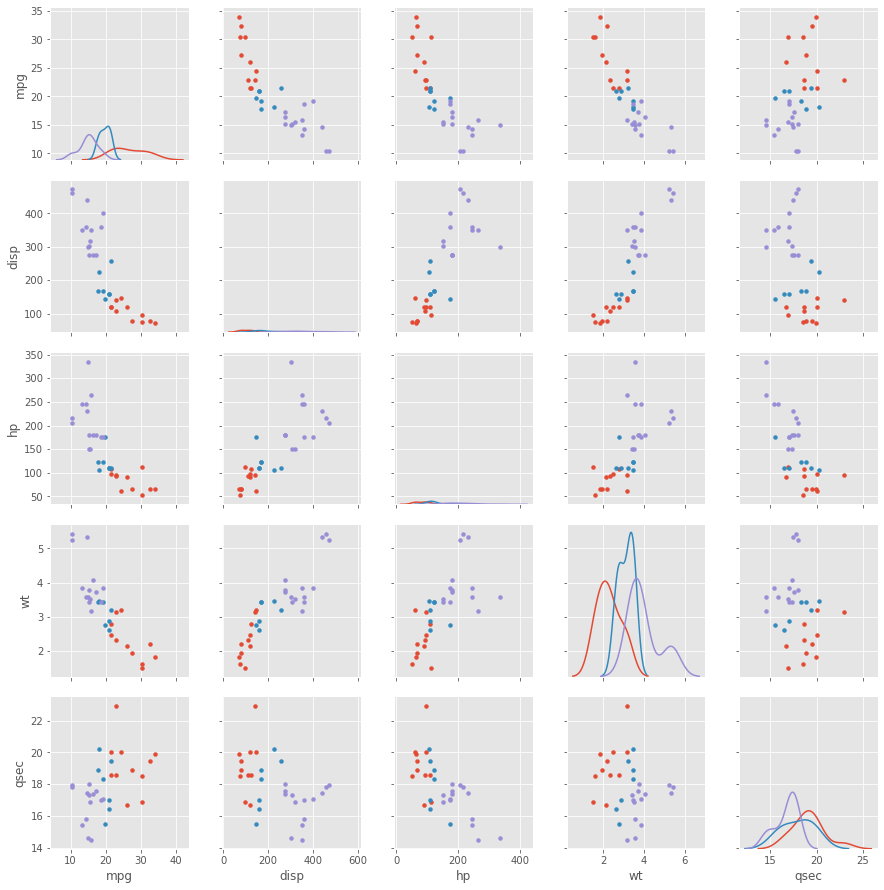

In [232]:
# Your work here

graph = sns.PairGrid(dfcars, vars=['mpg', 'disp', 'hp', 'wt', 'qsec'], hue='cyl')
graph.map_offdiag(plt.scatter, s=15)
graph.map_diag(sns.kdeplot)

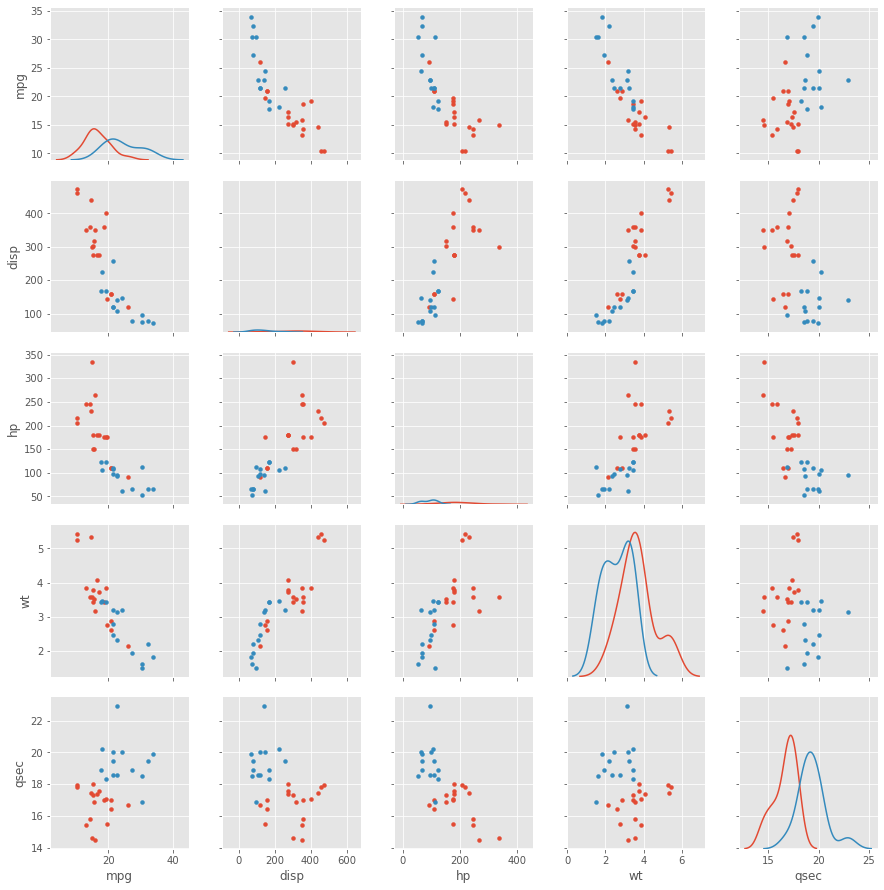

In [234]:
graph2 = sns.PairGrid(dfcars, vars=['mpg', 'disp', 'hp', 'wt', 'qsec'], hue='vs')
graph2.map_offdiag(plt.scatter, s=15)
graph2.map_diag(sns.kdeplot)

#### Correlation

The SPLOM seems to suggest correlations. We can calculate corelation with the Pandas corr() function.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html

In [235]:
dfcars[['mpg', 'wt', 'hp', 'qsec', 'disp']].corr()

,mpg,wt,hp,qsec,disp
mpg,1.000000,-0.867659,-0.776168,0.418684,-0.847551
wt,-0.867659,1.000000,0.658748,-0.174716,0.887980
hp,-0.776168,0.658748,1.000000,-0.708223,0.790949
qsec,0.418684,-0.174716,-0.708223,1.000000,-0.433698
disp,-0.847551,0.887980,0.790949,-0.433698,1.000000


Since correlations range from -1 to 1 through 0, a diverging palette is usually a good choice for visualizations.

In [245]:
# dpal = sns.choose_colorbrewer_palette('diverging', as_cmap=True)

NameError: name 'interact' is not defined

We can also use `maptplotlib`s correlation plot. These plots are especially helpful for both EDA and do see misclassification from your machine learning algorithms. EDA is even useful at the analysis stage.

([<matplotlib.axis.YTick at 0x13bf21a9780>,
 <a list of 5 Text yticklabel objects>)

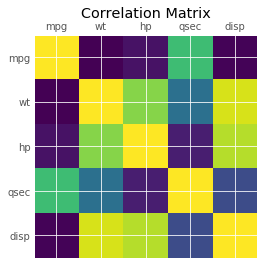

In [247]:
plt.matshow(dfcars[['mpg', 'wt', 'hp', 'qsec', 'disp']].corr()) #cmap=dpal)
ax = plt.gca()
ax.tick_params(axis='both', which='both',length=0)
plt.title("Correlation Matrix")
plt.xticks(range(5), ['mpg', 'wt', 'hp', 'qsec', 'disp'])
plt.yticks(range(5), ['mpg', 'wt', 'hp', 'qsec', 'disp'])


### KDE plots and sequential palettes.

We can make a KDE plot of a multivariate normal distribution. Since a probability density is strictly positive, with values near $0$ not being so interesting, a sequential palette is a good approach. Seaborn will by default provide such a palette for KDE plots, but you can also make your own.

In [248]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 1000)
df = pd.DataFrame(data, columns=["x", "y"])
df.head()

,x,y
0,-0.412162,0.480860
1,0.480214,3.482840
2,-0.286235,0.004325
3,-0.478529,0.590625
4,0.412331,1.745436


In [249]:
# seqpal = sns.choose_colorbrewer_palette("sequential", as_cmap=True)

NameError: name 'interact' is not defined

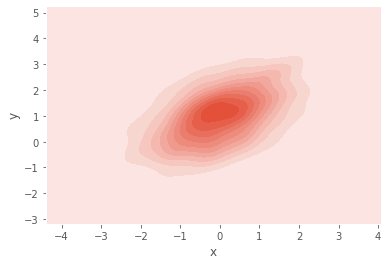

In [250]:
sns.kdeplot(df.x, df.y, shade=True)#, cmap=seqpal)

### Matplotlib and multiple plots: Small Multiples

There are many cases where we want to see plots side by side. For example, SPLOMS and Facet grids. 

Here is an example of a plot with one column and 3 rows. 

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html



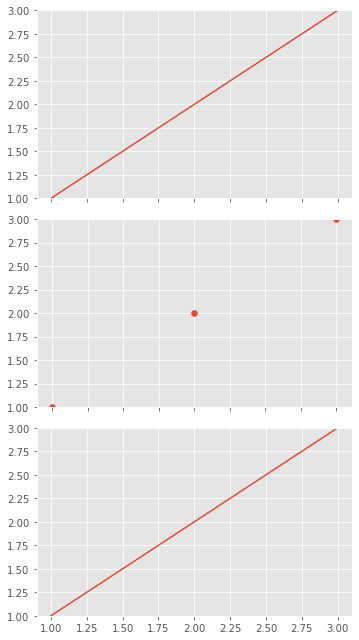

In [251]:
fig = plt.figure(figsize=(5, 9))

ax1 = fig.add_subplot(311)
ax1.plot([1, 2, 3], [1, 2, 3])
ax1.set_xticklabels([])
ax1.set_ylim([1.0, 3.0])

ax2 = fig.add_subplot(312)
ax2.scatter([1, 2, 3], [1, 2, 3])
ax2.set_xticklabels([])
ax2.set_ylim([1.0, 3.0])

ax3 = fig.add_subplot(313)
ax3.plot([1, 2, 3], [1, 2, 3])
ax3.set_ylim([1.0, 3.0])


fig.tight_layout()

### Small multiples, another approach

Here is another approach, which might be more straightforward than using `add_subplot`. It basically creates an array of plots and zips this array up with the various data grouped by categories.

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013BF7ADA3C8>
(7, 13)
(10, 13)
(3, 13)
(12, 13)
C:\Python37\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


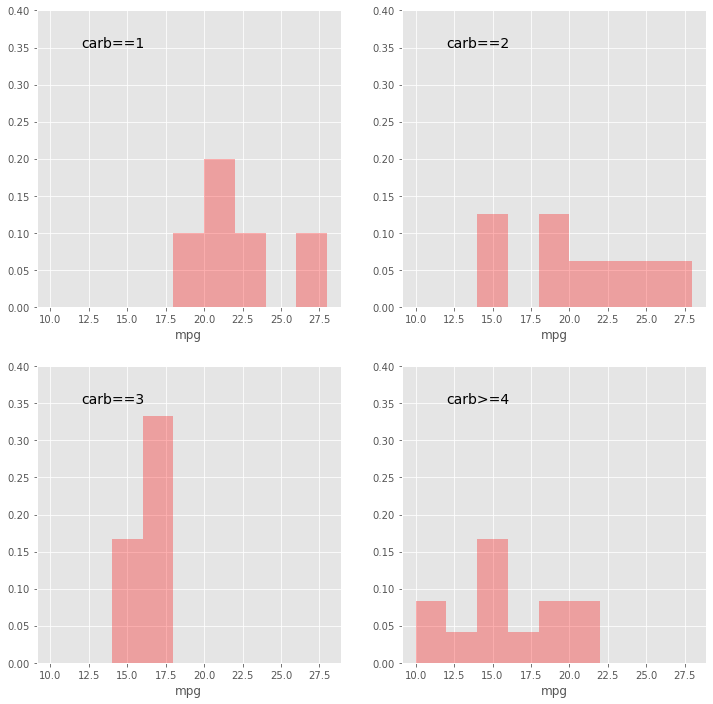

In [259]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
print(axes)
print(axes.ravel())
carbs = ['==1', '==2', '==3', '>=4']
bins = np.arange(10, 30, 2)
for ax, carb in zip(axes.ravel(), carbs):
    data = dfcars.query("carb%s" % carb)
    print(data.shape)
    # ax.plot(data.wt, data.mpg, 'o', markersize=10, alpha=0.5)
    ax.hist(data.mpg, bins=bins, histtype='stepfilled', normed=True, color='r', alpha=.3)    
    ax.annotate("carb"+str(carb), xy=(12, 0.35), fontsize=14)
    # ax.set_yticks([])
    ax.set_ylim((0,0.4))
    ax.set_xlabel('mpg')

#### Question 9

Take a few moments and re-examine the orginal dataset. Identify a couple of variables that you believe would be interesting to investigate. Generate subplots for different values for one of the two variables similar to the plot above. multiple plots.

C:\Python37\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


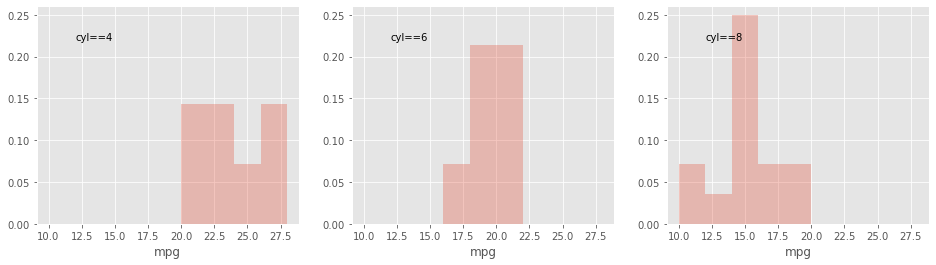

In [305]:
# Your work here

fig, axes = plt.subplots(nrows=1,  ncols=3, figsize=(16, 4))

cyls = ['4', '6', '8']

# plt.hist(dfcars.query('cyl==4').mpg)
# plt.show()

bins = np.arange(10, 30, 2)

for ax, cyl in zip(axes.ravel(), cyls):
    data = dfcars.query('cyl==%s' % cyl)
    ax.hist(data.mpg, bins=bins, histtype='stepfilled', normed=True, alpha=.3)
    ax.annotate("cyl==%s" % cyl, xy = (12, .22))
    ax.set_ylim((0,0.26))
    ax.set_xlabel('mpg')

#### Question 10

Create one additional plot you believe would be relevant to understanding the dataset. You may use any combination of variables and plot type.

In [0]:
# Your work here
